In [1]:
import sqlalchemy as sa
import pandas as pd
_db = 'sqlite:///guitar_listings.db'
engine = sa.create_engine(_db)

from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
    print('*'*50,'\n',table_name,'\n','*'*50)
    for column in inspector.get_columns(table_name):
       print("Column: %s" % column['name'])

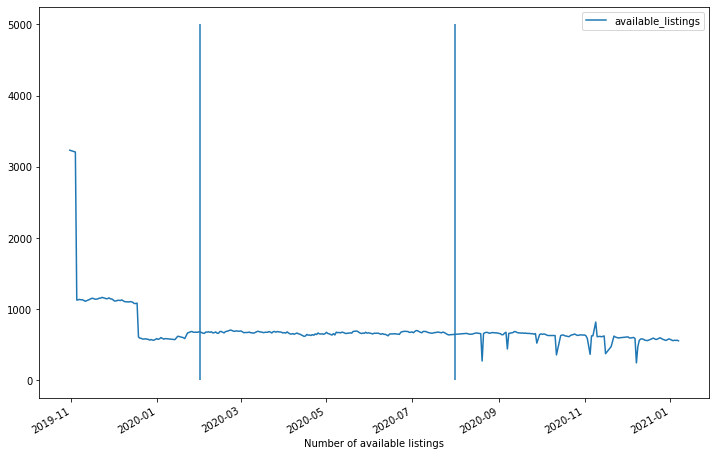

In [2]:
from guitar_scraping.questions import sales_availability
import matplotlib.pyplot as plt
from datetime import datetime
sales_avail_df = sales_availability()
fig, ax = plt.subplots(figsize=(12,8))
sales_avail_df.plot(ax = ax)
ax.set_xlabel('Number of available listings')

start_date = datetime(2020,2,1)
end_date = datetime(2020,8,1)

ax.vlines(start_date,0,5000)
ax.vlines(end_date,0,5000)


In [3]:
from guitar_scraping.questions import daywise_manufacturer_count

manu_count_df = daywise_manufacturer_count(start_date=start_date, end_date=end_date)
most_listed = manu_count_df.sum().sort_values(ascending=False).index[:10]
monthly_average= manu_count_df.resample('M').mean()

daily_average= manu_count_df.resample('D').mean()
most_listed_daily_average= daily_average.loc[:,most_listed]

most_listed_monthly_average= monthly_average.loc[:,most_listed]
most_listed_monthly_average.head()

manufacturer,Gibson,Taylor,Yamaha,Harley Benton,Framus,Fender,Ibanez,Furch,Takamine,Guild
date,,,,,,,,,,
2020-02-29,90.448276,84.241379,57.689655,41.724138,28.206897,31.241379,31.965517,29.586207,34.724138,27.517241
2020-03-31,84.516129,81.258065,50.677419,39.935484,23.161290,27.903226,32.709677,28.838710,31.645161,31.709677
2020-04-30,75.500000,76.266667,43.766667,38.166667,30.966667,24.500000,30.200000,28.400000,26.533333,29.166667
2020-05-31,71.870968,73.516129,47.000000,38.612903,46.354839,32.225806,30.645161,28.580645,25.774194,26.580645
2020-06-30,72.166667,63.000000,43.066667,35.766667,41.666667,31.300000,26.633333,30.100000,28.166667,26.433333


Text(0.5, 0, 'Date')

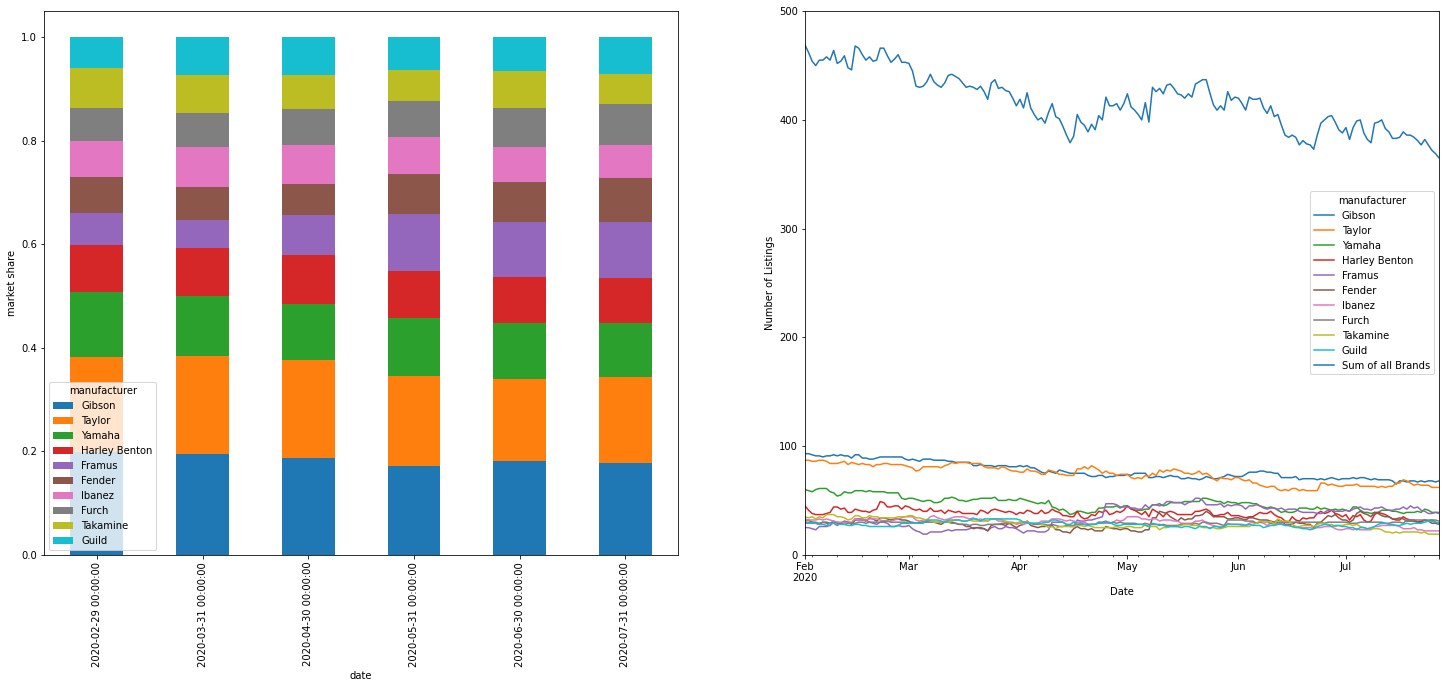

In [4]:
import seaborn as sns
normalized_for_plotting = most_listed_monthly_average.div(most_listed_monthly_average.sum(axis=1), axis=0)
fig, axes = plt.subplots(1,2,figsize=(25,10))
normalized_for_plotting.plot(kind='bar',stacked='True',ax=axes[0])
axes[0].set_ylabel('market share')

most_listed_daily_average['Sum of all Brands'] = most_listed_daily_average.sum(axis=1)
most_listed_daily_average.plot(kind='line',ax=axes[1])
axes[1].set_ylim((0,500))
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlabel('Date')


# Notes:
* Normalize market share to total listings
* make line plot with daily data
* add a 'others' category

# Other possible questions:
* number of unique Artikelnummern per manufacturer over time 
* are there dates at which manufacturers tend to release new guitars?
* Segment manufacturers bynumber of listings, average price, price range, sales rank?

In [5]:
from datetime import datetime
from guitar_scraping.questions import day_data
dd = day_data(datetime(2020,3,31).date())
dd.head()

,modell,bauweise,cutaway,farbe,griffbrett,inkl_gigbag,koffer,tonabnehmer,verkaufsrang,hersteller_id,...,buende,holz_decke,holz_boden_zargen,artikelnummer,id,name,artikelnummer_1,date,preis,verkaufsrang_1
0,Luna Guitars Safari Bamboo Travel G B-Stock,Travel,False,Natur,Walnuss,True,False,None,78279,29,...,NaN,Bambus,Bambus,479768,29,Luna Guitars,479768.0,2020-03-31 10:37:44.923944,119.0,77829
1,Takamine P6N-BSB,NEX,False,"Sunburst, Hochglanz",Ebenholz,False,True,None,10140,39,...,NaN,"Fichte, Massiv",Ahorn,333224,39,Takamine,333224.0,2020-03-31 10:37:44.923944,2029.0,8509
2,Journey Instruments PJ 410N,Travel,False,Natur,Ovangkol,True,False,None,37490,24,...,NaN,Sitka Fichte massiv,Mahagoni,486308,24,Journey Instruments,486308.0,2020-03-31 10:37:44.923944,389.0,31236
3,Cuntz Guitars Marie Parlour 12th fret,Parlor,False,Natur,Ebenholz,False,True,None,86034,7,...,NaN,"Fichte, Massiv","Palisander, Massiv",337379,7,Cuntz Guitars,337379.0,2020-03-31 10:37:44.923944,3850.0,90484
4,Art & Lutherie Roadhouse BB A/E w. Gigbag,Parlor,False,Burst,Palisander,True,False,None,85317,1,...,NaN,"Fichte, Massiv",Kirsche,462333,1,Art & Lutherie,462333.0,2020-03-31 10:37:44.923944,639.0,36941


manufacturer,Art & Lutherie,Baton Rouge,Breedlove,Brümmer,Cole Clark,Cort,Cuntz Guitars,DAngelico,Dean Guitars,ESP,...,Richwood,Seagull,Shadow,Shadow Guitars,Takamine,Tanglewood,Taylor,Timberline Guitars,Traveler Guitar,Yamaha
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,20.0,15.0,2.0,2.0,13.0,11.0,5.0,18.0,2.0,3.0,...,NaN,24.0,1.0,2.0,35.0,3.0,87.0,NaN,1.0,60.0
2020-02-02,18.0,15.0,2.0,2.0,13.0,11.0,5.0,18.0,2.0,2.0,...,NaN,24.0,1.0,2.0,34.0,3.0,87.0,NaN,1.0,59.0
2020-02-03,19.0,15.0,2.0,2.0,13.0,10.0,5.0,18.0,2.0,2.0,...,NaN,24.0,1.0,2.0,35.0,3.0,86.0,NaN,1.0,58.0
2020-02-04,19.0,15.0,2.0,2.0,13.0,11.0,5.0,18.0,2.0,2.0,...,NaN,24.0,1.0,2.0,33.0,3.0,86.0,NaN,1.0,60.0
2020-02-05,20.0,15.0,2.0,2.0,13.0,10.0,5.0,22.0,2.0,3.0,...,NaN,27.0,1.0,2.0,35.0,4.0,87.0,NaN,1.0,61.0


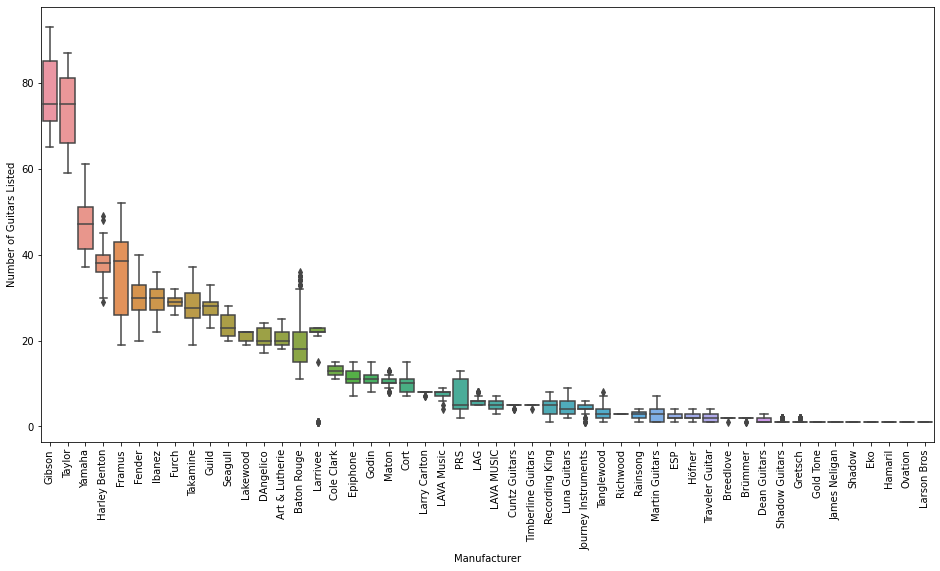

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

.. note::
    This function always treats one of the variables as categorical and
    draws data at ordinal positions (0, 1, ... n) on the relevant axis,
    even when the data has a numeric or date type.

See th

In [6]:
import missingno as msno
#msno.matrix(manu_count_df.sort_index())

total_day_listings = manu_count_df.expanding().sum().iloc[-1]

import seaborn as sns
fig = plt.figure(figsize=(16,8))

display( manu_count_df.head())

sorted_df = manu_count_df.reindex(manu_count_df.mean().sort_values(ascending=False).index, axis=1)
sns.boxplot(sorted_df)
plt.ylabel('Number of Guitars Listed')
plt.xlabel('Manufacturer')
import matplotlib.pyplot as plt 
plt.xticks(rotation=90)
plt.show()

sns.boxplot?


In [8]:
import guitar_scraping

guitar_scraping.__file__

'/home/carl/notebooks/guitar_scraping/guitar_scraping/__init__.py'